In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.model_selection import KFold, cross_val_score
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score,mean_squared_error

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet
import plotly.express as px


In [ ]:
data =pd.read_csv('/content/AAPL.csv')


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7111 entries, 0 to 7110
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       7111 non-null   object 
 1   Open       7111 non-null   float64
 2   High       7111 non-null   float64
 3   Low        7111 non-null   float64
 4   Close      7111 non-null   float64
 5   Adj Close  7111 non-null   float64
 6   Volume     7111 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 389.0+ KB


In [ ]:
data.describe()


,Open,High,Low,Close,Adj Close,Volume
count,7111.000000,7111.000000,7111.000000,7111.000000,7111.000000,7.111000e+03
mean,26.026024,26.323060,25.737972,26.042884,25.033650,4.005232e+08
std,42.536412,43.057522,42.047141,42.577014,42.322263,3.787951e+08
min,0.114955,0.118304,0.113839,0.115513,0.098315,3.519590e+07
25%,0.410536,0.418917,0.401786,0.410803,0.349642,1.424998e+08
50%,6.075714,6.148929,5.946429,6.054643,5.153219,2.850260e+08
75%,28.987500,29.192500,28.713750,28.917500,26.498893,5.232066e+08
max,182.630005,182.940002,179.119995,182.009995,180.683868,7.421641e+09


In [ ]:
data=data.drop("Adj Close",axis='columns')


In [ ]:
data.index = pd.DatetimeIndex(data['Date'])


In [ ]:
data.head()


,Date,Open,High,Low,Close,Volume
Date,,,,,,
1995-01-24,1/24/1995,0.377232,0.378348,0.369420,0.371652,218097600
1995-01-25,1/25/1995,0.352679,0.375000,0.352679,0.365932,517070400
1995-01-26,1/26/1995,0.364955,0.370536,0.350446,0.352679,246388800
1995-01-27,1/27/1995,0.356027,0.360491,0.348214,0.356027,298569600
1995-01-30,1/30/1995,0.358259,0.361607,0.356027,0.358259,230585600


In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7111 entries, 1995-01-24 to 2023-04-21
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    7111 non-null   object 
 1   Open    7111 non-null   float64
 2   High    7111 non-null   float64
 3   Low     7111 non-null   float64
 4   Close   7111 non-null   float64
 5   Volume  7111 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 388.9+ KB


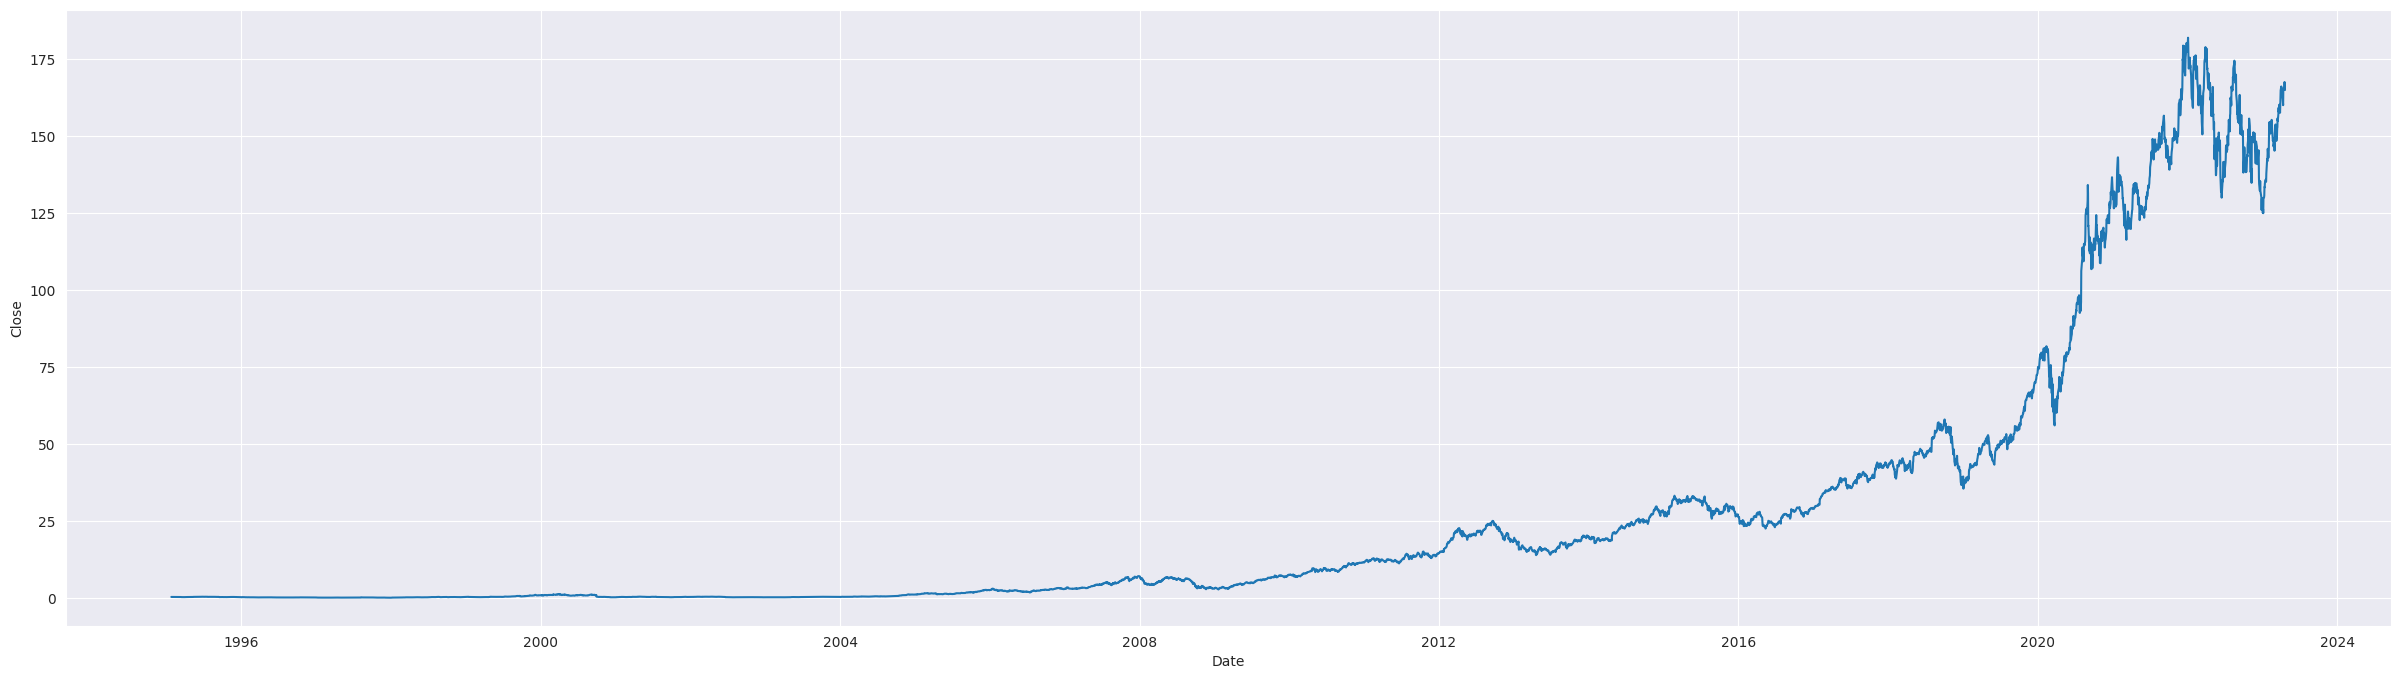

In [ ]:

plt.figure(figsize=(30,8))
sns.set_style('darkgrid')
sns.lineplot(y='Close',x=data.index,data=data)
plt.show()

In [ ]:
X = data.drop('Close', axis='columns')
y = data['Close']


In [ ]:
X.shape,y.shape


((7111, 5), (7111,))

In [ ]:
X.isnull().sum()

Date      0
Open      0
High      0
Low       0
Volume    0
dtype: int64

In [ ]:
X = X.drop('Date',axis='columns')


In [ ]:
X.head()


,Open,High,Low,Volume
Date,,,,
1995-01-24,0.377232,0.378348,0.369420,218097600
1995-01-25,0.352679,0.375000,0.352679,517070400
1995-01-26,0.364955,0.370536,0.350446,246388800
1995-01-27,0.356027,0.360491,0.348214,298569600
1995-01-30,0.358259,0.361607,0.356027,230585600


In [ ]:

closedf = data[['Date','Close']]
print("Shape of close dataframe:", data.shape)

Shape of close dataframe: (7111, 6)


In [ ]:

fig = px.line(closedf, x=closedf.Date, y=closedf.Close,labels={'Date':'Date','Close':'Close Stock'})
fig.update_traces(marker_line_width=2, opacity=0.8)
fig.update_layout(title_text='Stock close price chart', plot_bgcolor='white', font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4)


In [ ]:


scaler = MinMaxScaler()
num = ['Open','High','Low','Volume']

X_train[num]= scaler.fit_transform(X_train[num])
X_test[num]= scaler.fit_transform(X_test[num])

In [ ]:
mlp = MLPRegressor(warm_start=True,random_state=48, solver  = 'adam',
    hidden_layer_sizes= (75,100,120),
    activation ='relu',
    alpha = 0.0001,
    learning_rate = 'adaptive',
    max_iter = 1200,
    early_stopping=True)

In [ ]:
best_model = mlp.fit(X_train, y_train,)
kfold = KFold(n_splits=5)
val_score = cross_val_score(best_model,X_train,y_train,cv=kfold)

In [ ]:
print("Validation Score of given Model is : ", val_score)


Validation Score of given Model is :  [0.99977824 0.99971927 0.99973312 0.99976909 0.99975275]


In [ ]:
from sklearn.metrics import r2_score

y_pred = best_model.predict(X_test)
print('R2 score of Model is ',r2_score(y_test, y_pred))

R2 score of Model is  0.9997359247649705


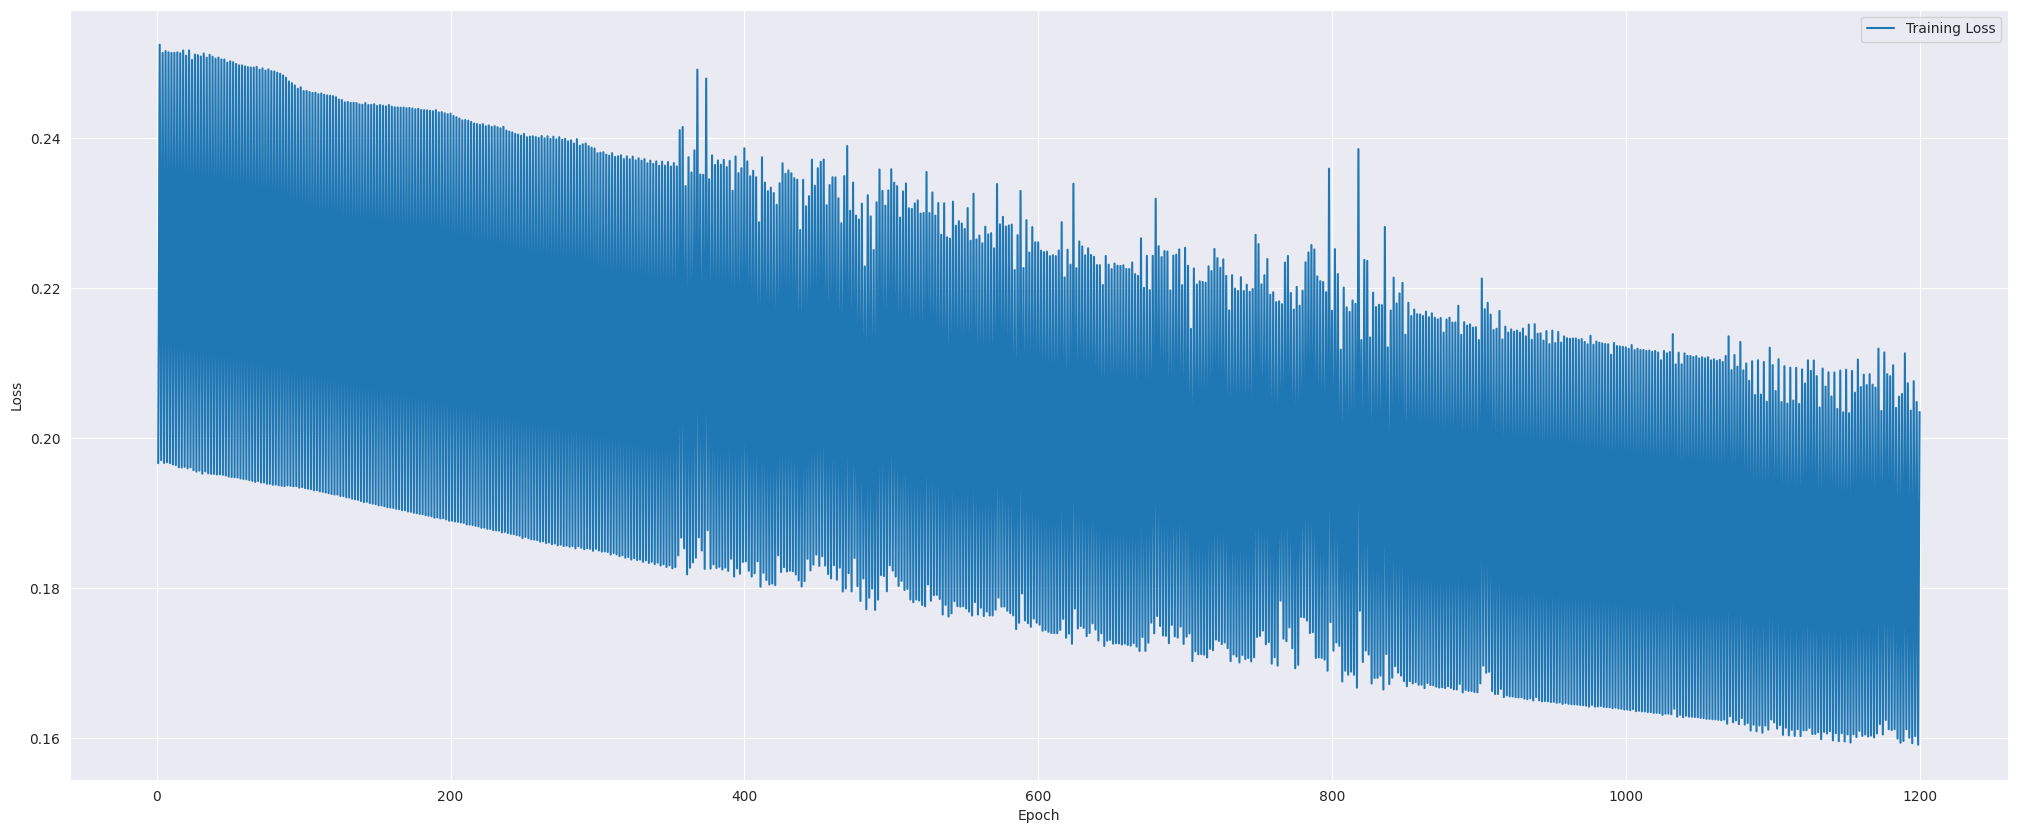

In [ ]:
train_losses = []
val_losses = []
for i in range(mlp.max_iter):
    mlp.fit(X_train, y_train)
    train_losses.append(mlp.loss_)



val_losses = mlp.validation_scores_
epochs = np.arange(1, mlp.max_iter+1)
plt.figure(figsize=(25,10))

plt.plot(epochs, train_losses,label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

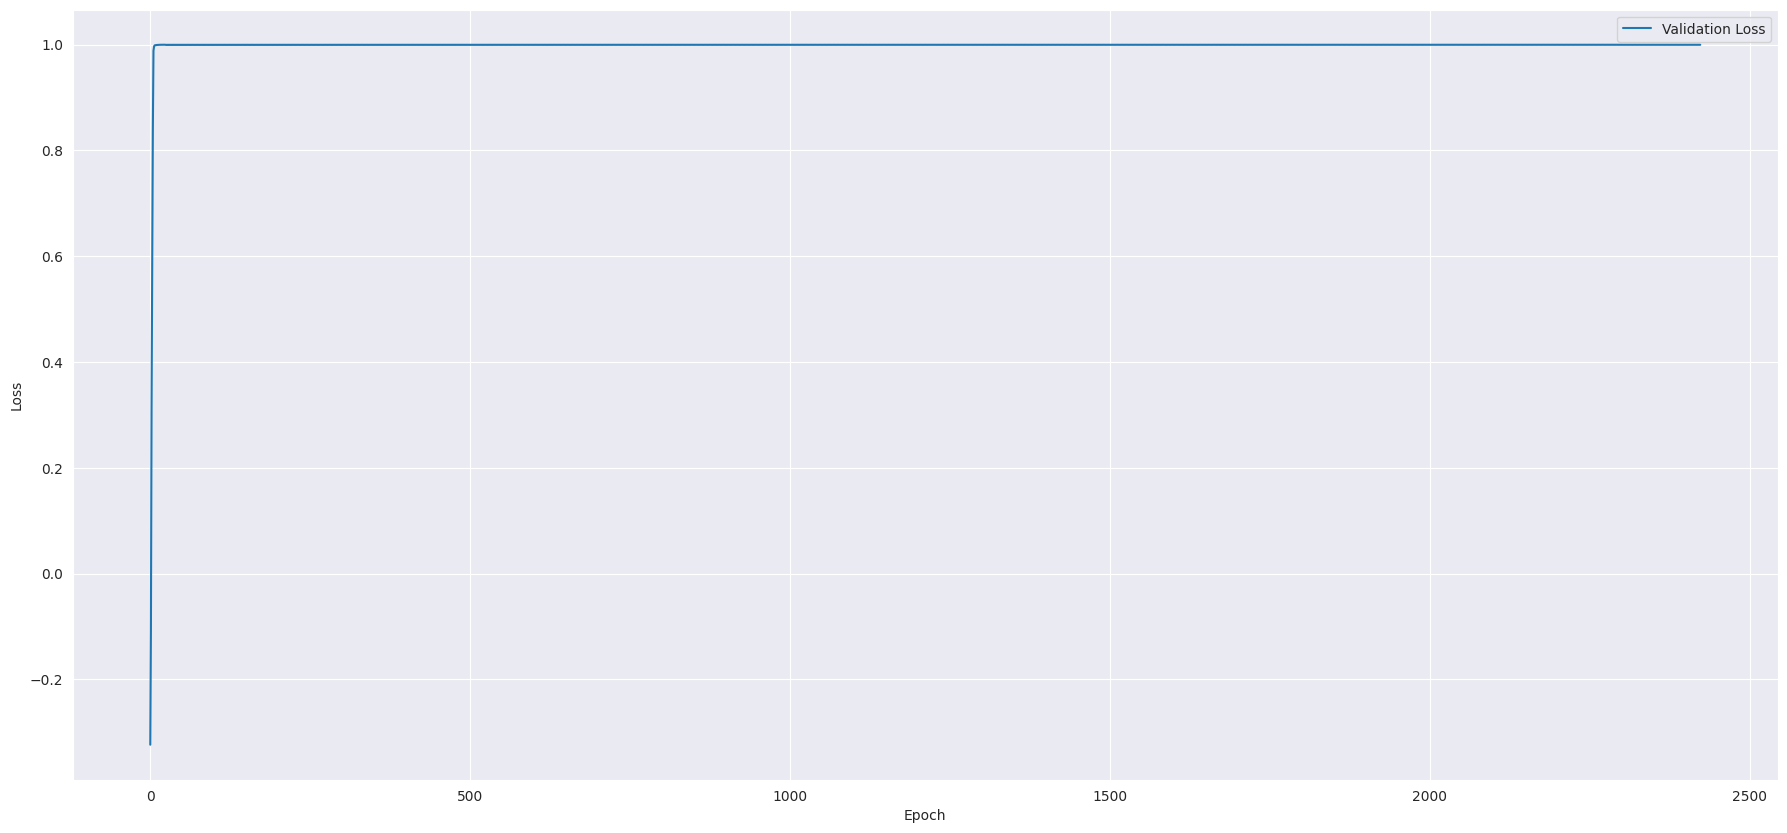

In [ ]:
plt.figure(figsize=(22,10))
plt.plot(range(len(val_losses)), val_losses,label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.3)


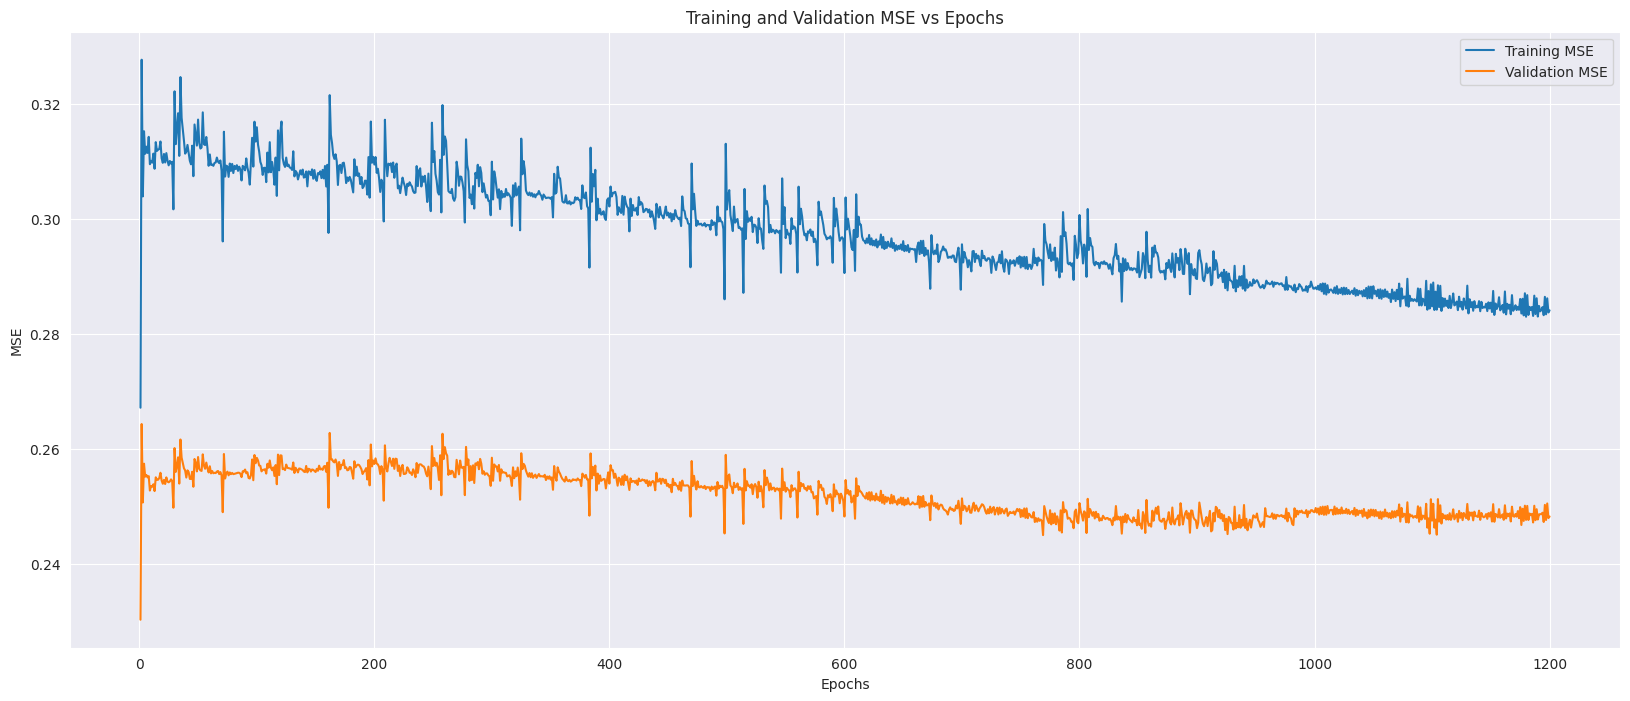

In [ ]:
train_errors, val_errors = [], []
for i in range(mlp.max_iter):
    mlp.fit(X_train, y_train)
    y_train_pred = mlp.predict(X_train)
    y_val_pred = mlp.predict(X_valid)
    train_errors.append(mean_squared_error(y_train, y_train_pred))
    val_errors.append(mean_squared_error(y_valid, y_val_pred))

# plot the training and validation errors
plt.figure(figsize=(20,8))
epochs = np.arange(1, mlp.max_iter+1)
plt.plot(epochs, train_errors, label='Training MSE')
plt.plot(epochs, val_errors, label='Validation MSE')
plt.title('Training and Validation MSE vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()

In [ ]:
print("Weights feeded to First Hidden layer are :", mlp.coefs_[0])

print("Weights feeded to Second Hidden layer are :", mlp.coefs_[1])

print("Weights feeded to Third Hidden layer are :", mlp.coefs_[2])

Weights feeded to First Hidden layer are : [[-3.21885117e-140  1.25488578e-001 -1.13677642e-141 -1.82604806e-002
   1.40045819e-001 -4.06236603e-142  9.77499619e-002 -4.03607491e-002
   3.79479152e-003 -1.31283883e-142 -5.62672925e-085 -2.51156688e+000
  -3.02029999e-145 -9.60827801e-002 -1.41423958e+000  9.11059651e-020
  -1.86175899e-032 -8.77353064e-003 -3.42428627e-130 -4.65078611e-099
  -3.61282646e-139 -2.37141145e-001 -2.24504872e-001 -4.99342867e-001
   2.31440896e-002  1.05705197e-001  1.27930159e-100  2.45046950e-144
  -8.62281269e-002  1.76350659e-002 -2.63765027e+000  4.54515241e-142
  -1.07833133e+000  2.37551911e-049 -1.82104574e-004 -3.00122023e-002
   4.99962105e-006  1.35362476e-001 -2.23565891e-001  6.72243050e-002
  -1.07184378e-141  2.96433296e-001  2.37010085e-001  2.15311374e-001
  -1.45498060e+000 -2.32273707e-001 -1.75058798e-140  5.28981978e-002
   1.16147994e-001  2.12350609e-001 -2.43023397e-001 -6.45556709e-141
  -1.16132609e-049 -5.36883075e-140  1.48425409

<Axes: xlabel='Date', ylabel='Close'>

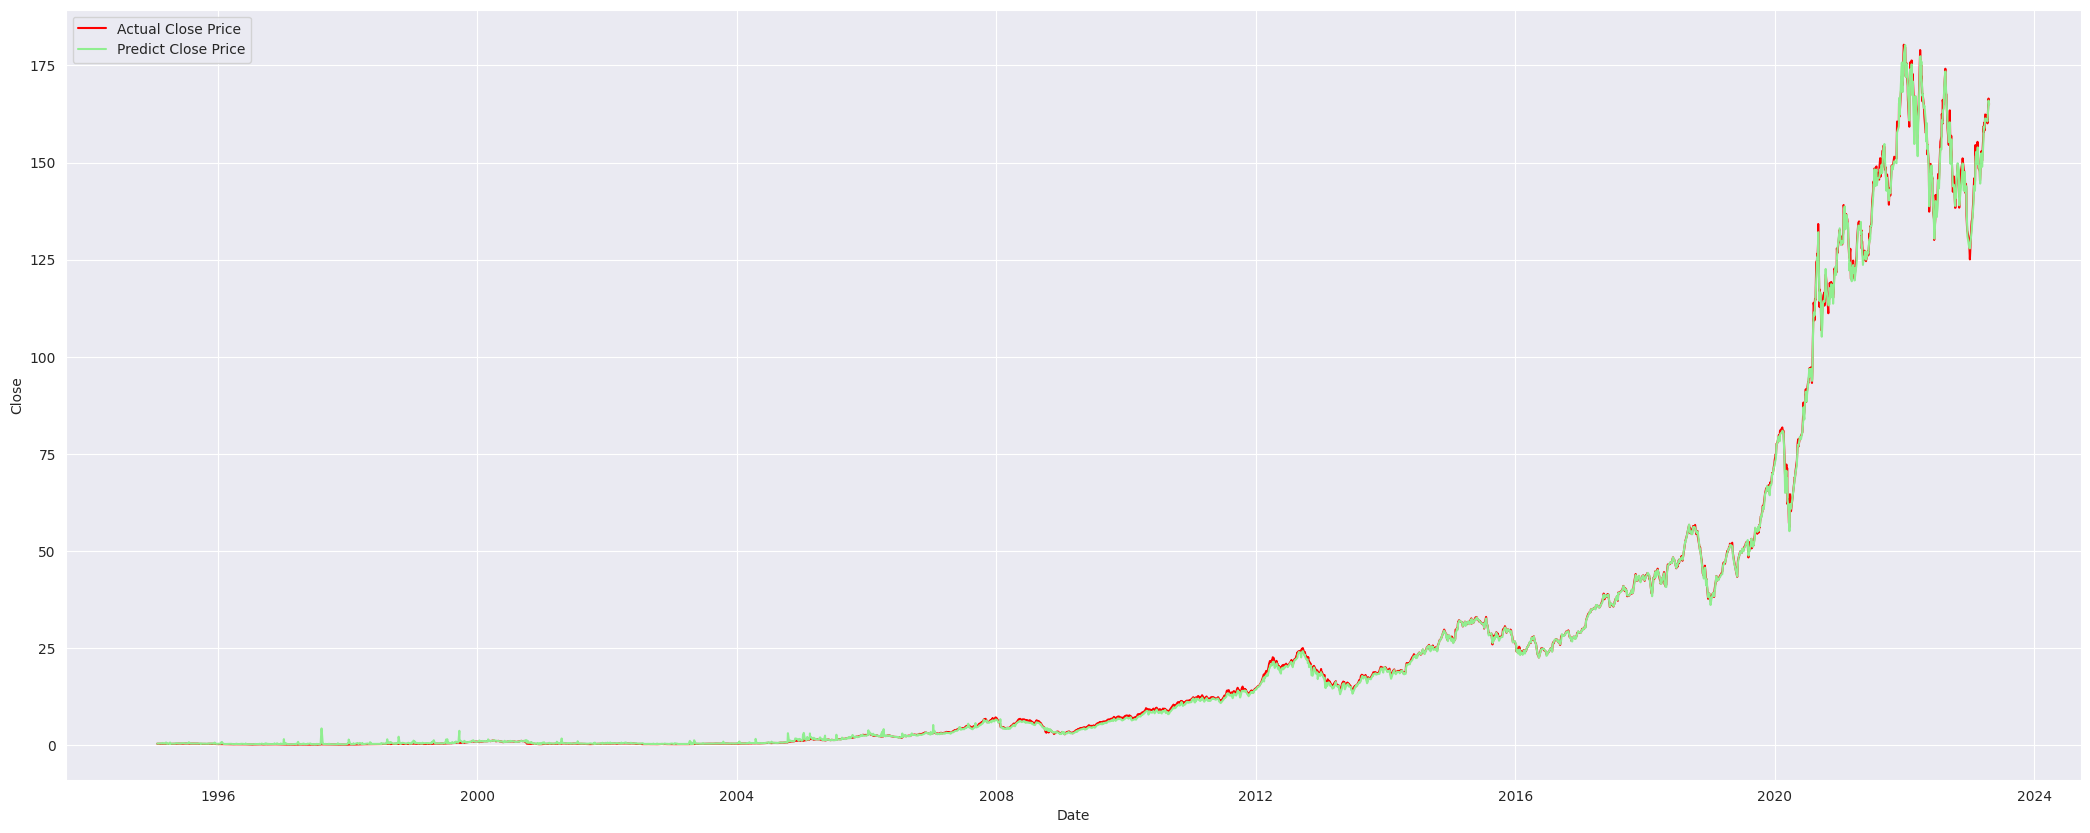

In [ ]:
fig,ax =plt.subplots(figsize=(26,10))
sns.set_style('darkgrid')
sns.lineplot( data=y_test,ax=ax,label='Actual Close Price',color='Red')
sns.lineplot( y =y_pred, x=y_test.index, ax=ax,label='Predict Close Price',color='LightGreen')

In [ ]:

future_pred_price = pd.DataFrame(columns=['ds', 'y'])
future_pred_price['ds']= data['Date']
future_pred_price['y'] = data['Close']




In [ ]:

future_pred_model = Prophet()
future_pred_model.fit(future_pred_price)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwww_x3ii/l11q4_vr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwww_x3ii/gcd7x7of.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35438', 'data', 'file=/tmp/tmpwww_x3ii/l11q4_vr.json', 'init=/tmp/tmpwww_x3ii/gcd7x7of.json', 'output', 'file=/tmp/tmpwww_x3ii/prophet_modelpc3kaydn/prophet_model-20240402170404.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:04:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:04:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


<Figure size 2500x2000 with 0 Axes>

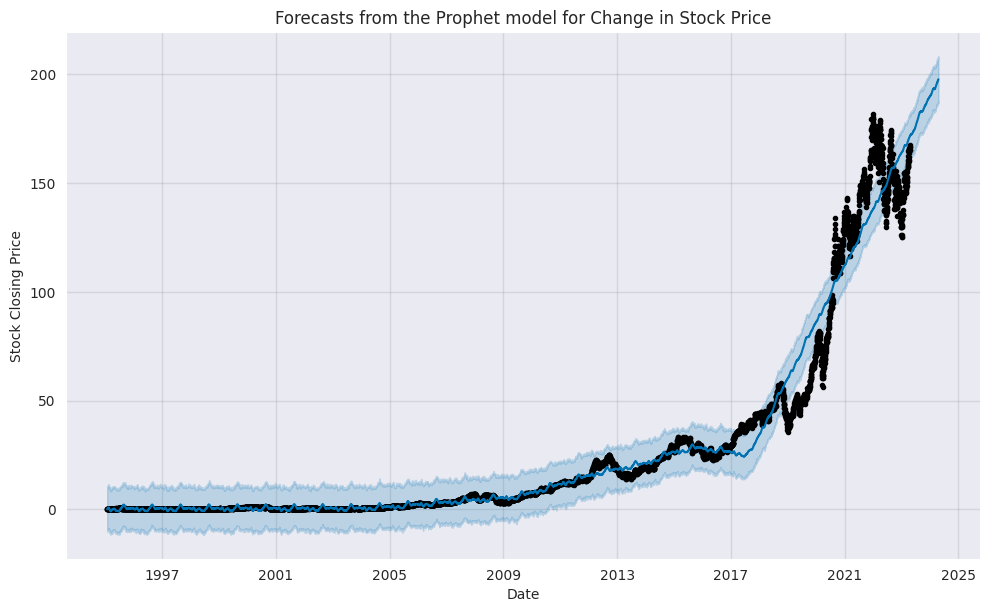

In [ ]:
future_dates = future_pred_model.make_future_dataframe(periods=365)
forecast = future_pred_model.predict(future_dates)

plt.figure(figsize=(25,20))
future_pred_model.plot(forecast)
plt.title("Forecasts from the Prophet model for Change in Stock Price")

plt.xlabel('Date')
plt.ylabel('Stock Closing Price')

plt.show()